In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

import sys
sys.path.append("../")
from sir.ODE_Function import *

In [6]:
#Define max infection event
def p0(t, SIR):
    '''
    Defining event to find max point.
    
    Based on our initial conditions, y' will be positive to start,
    and then will reach a max when y' = zero,
    and then it will be negative.
    '''
    ydot = c[0] * SIR[0] * SIR[1] - c[1] * SIR[1]
    return ydot

#Define infection-zero event
def y0(t, SIR): 
    '''
    Defining event to find zero point.
    
    Effectively we want to know when y(t) is sufficiently low enough
    We subtract a value less than the initial condition y0 for the desired return zero
    This is set because we never actually reach a zero.  We only approach it over time.
    '''
    if t==0:
        return 1
    else:
        return SIR[1] - 0.0000095


At it's max, the infected population constituted 6.324179432454466% of the total population.
From the start, it took 103.37198754267519 days to reach this maximum.
After the peak of infections, it took 133.55849151125443 days to reach the end of the pandemic.
In total, the pandemic lasted 236.93047905392962 days.
In the process, 58.252765614599625% of the population had to be 'removed' (recovered or dead).


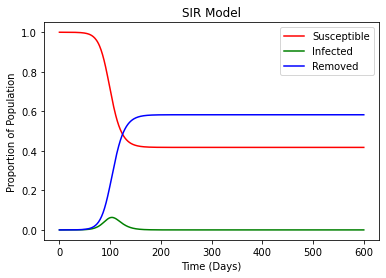

In [7]:
#Single Solution Script

#Define time span, initial conditions, and constants
tspan = np.linspace(0, 600, 601) #Time period - 600 days (601 including 0)

SIR_init = [0.99999, 0.00001, 0] #Initial conditions - .001 % of population

b = .30 #Infection Rate
k = .20 #Removal Rate
r0 = b/k

c = [b, k] #Array of constants (referenced in derivative function)

#Solve differential equation - single solution
sol = solve_ivp(lambda t, SIR: f(t, SIR, c), \
                [tspan[0], tspan[-1]], SIR_init, t_eval=tspan, events=(p0, y0))

Susceptible = plt.plot(sol.t, sol.y[0], 'r', label='Susceptible')
Infected = plt.plot(sol.t, sol.y[1], 'g', label='Infected')
Removed = plt.plot(sol.t, sol.y[2], 'b', label='Removed')
plt.xlabel('Time (Days)')
plt.ylabel('Proportion of Population')
plt.title('SIR Model')
plt.legend()
plt.show

EventPrints(sol)

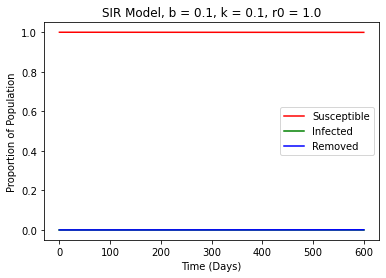

The infected population had no closed maximum.
The infected population never returned to zero


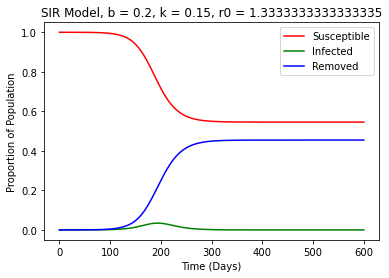

At it's max, the infected population constituted 3.4405089737229453% of the total population.
From the start, it took 193.25229983120164 days to reach this maximum.
After the peak of infections, it took 230.38726358444592 days to reach the end of the pandemic.
In total, the pandemic lasted 423.63956341564756 days.
In the process, 45.45227836736935% of the population had to be 'removed' (recovered or dead).


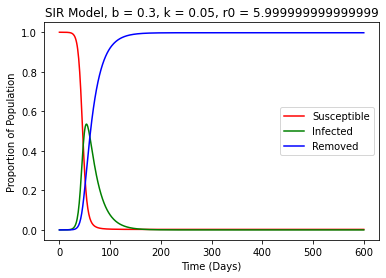

At it's max, the infected population constituted 53.53433814263031% of the total population.
From the start, it took 53.275419275684364 days to reach this maximum.
After the peak of infections, it took 229.978027570205 days to reach the end of the pandemic.
In total, the pandemic lasted 283.25344684588936 days.
In the process, 99.7454892374489% of the population had to be 'removed' (recovered or dead).


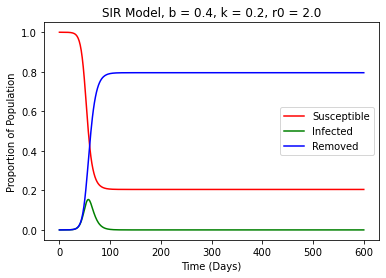

At it's max, the infected population constituted 15.38613009673665% of the total population.
From the start, it took 56.91663185464143 days to reach this maximum.
After the peak of infections, it took 90.57336719238236 days to reach the end of the pandemic.
In total, the pandemic lasted 147.4899990470238 days.
In the process, 79.5271334896339% of the population had to be 'removed' (recovered or dead).


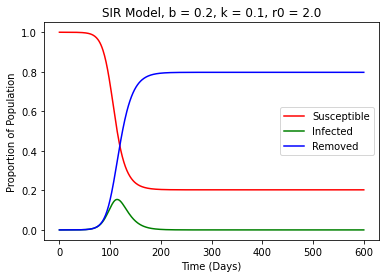

At it's max, the infected population constituted 15.409542987219247% of the total population.
From the start, it took 113.80384998983827 days to reach this maximum.
After the peak of infections, it took 180.14509604619417 days to reach the end of the pandemic.
In total, the pandemic lasted 293.94894603603245 days.
In the process, 79.7204479093297% of the population had to be 'removed' (recovered or dead).


In [8]:
#Multi Solution Script

#Define time span, initial conditions, and constants
tspan = np.linspace(0, 600, 601) #Time period - 300 days (301 including 0)

SIR_init = [0.99999, 0.00001, 0] #Initial conditions - .001 % of population

parameters = np.array([[0.10, 0.20, 0.30, 0.40, 0.20],\
                       [0.10, 0.15, 0.05, 0.20 ,0.10]])

for i in range(parameters.shape[1]):
    b = parameters[0,i]
    k = parameters[1,i]
    c = [b, k]
    r0 = b/k
        
    #Solve differential equation
    sol = solve_ivp(lambda t, SIR: f(t, SIR, c), \
                    [tspan[0], tspan[-1]], SIR_init, t_eval=tspan, events=(p0,y0))
        
    figure = plt.figure()
    plt.plot(sol.t, sol.y[0], 'r', label='Susceptible')
    plt.plot(sol.t, sol.y[1], 'g', label='Infected')
    plt.plot(sol.t, sol.y[2], 'b', label='Removed')
    plt.xlabel('Time (Days)')
    plt.ylabel('Proportion of Population')
    plt.title('SIR Model, b = {}, k = {}, r0 = {}'.format(b, k, r0))
    plt.legend()
    plt.show()
    figure.savefig('SIR Model, b = {}, k = {}, r0 = {}.png'.format(b, k, r0))
        

    #Event Interpolation Results
    EventPrints(sol)
  

In [11]:
#Phase Diagram Script

#Define time span, initial conditions, and constants
tspan = np.linspace(0, 600, 601)

SIR_init = [0.99999, 0.00001, 0] 

brange = np.arange(.01, .5, .01) 
krange = np.arange(.01, .5, .01) 

#Initialize tri-criteria arrays
lowrangeb = np.array([])
lowrangek = np.array([])

midrangeb = np.array([])
midrangek = np.array([])

highrangeb = np.array([])
highrangek = np.array([])

#Loop over parametric range
for b in brange:
    for k in krange:
        c = [b, k]
        r0 = b/k
        
        #Solve differential equation
        sol = solve_ivp(lambda t, SIR: f(t, SIR, c), \
                        [tspan[0], tspan[-1]], SIR_init, t_eval=tspan)
        
        #Define qualifying condition
        condition = sol.y[2, -1] #final value of removed individuals
        
        if condition < .05: #very few removed
            lowrangeb = np.append(lowrangeb, np.array([b]), axis = 0)
            lowrangek = np.append(lowrangek, np.array([k]), axis = 0)
        elif condition > .95: #almost all removed
            highrangeb = np.append(highrangeb, np.array([b]), axis = 0)
            highrangek = np.append(highrangek, np.array([k]), axis = 0)
        else: #in the middle
            midrangeb = np.append(midrangeb, np.array([b]), axis = 0)  
            midrangek = np.append(midrangek, np.array([k]), axis = 0)  

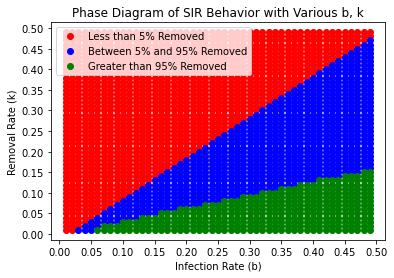

In [14]:
#Plot Phase Diagram From Above Script
Phase_Diagram = plt.figure()
plt.plot(lowrangeb, lowrangek, 'ro', label='Less than 5% Removed')
plt.plot(midrangeb, midrangek, 'bo', label='Between 5% and 95% Removed')
plt.plot(highrangeb, highrangek, 'go', label='Greater than 95% Removed')
plt.xlabel('Infection Rate (b)')
plt.xticks([0.00, 0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50])
plt.ylabel('Removal Rate (k)')
plt.yticks([0.00, 0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50])
plt.title('Phase Diagram of SIR Behavior with Various b, k')
plt.legend()
plt.show()
Phase_Diagram.savefig('ODE Phase Diagram.png')